In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

df = pd.read_csv('creditcard.csv')

In [2]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

1. Problem Statement

Credit card fraud is a big issue and detection is vital. This dataset includes data from two days worth of credit card transactions from Europe in late 2013. It is stated that this dataset is highly unbalanced, as only 492/284807 are fraudulant. The class variable will be the target with 0, being no fraud and 1 being fraud. My prediction goal is to be able to predict when a transaction is fraudulant.

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


2. Data cleaning

In [5]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
import numpy as np
for cols in df.columns:
    pct_missing = (df[cols].isnull().sum())/df.shape[0]
    print(cols , round(pct_missing, 2))

Time 0.0
V1 0.0
V2 0.0
V3 0.0
V4 0.0
V5 0.0
V6 0.0
V7 0.0
V8 0.0
V9 0.0
V10 0.0
V11 0.0
V12 0.0
V13 0.0
V14 0.0
V15 0.0
V16 0.0
V17 0.0
V18 0.0
V19 0.0
V20 0.0
V21 0.0
V22 0.0
V23 0.0
V24 0.0
V25 0.0
V26 0.0
V27 0.0
V28 0.0
Amount 0.0
Class 0.0


In [7]:
# drop a column by its column name
remove = ['Time']
df.drop(remove, inplace=True, axis=1)
print(df.shape)

(284807, 30)


In [8]:
# del dupes
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(284807, 30)
(275663, 30)


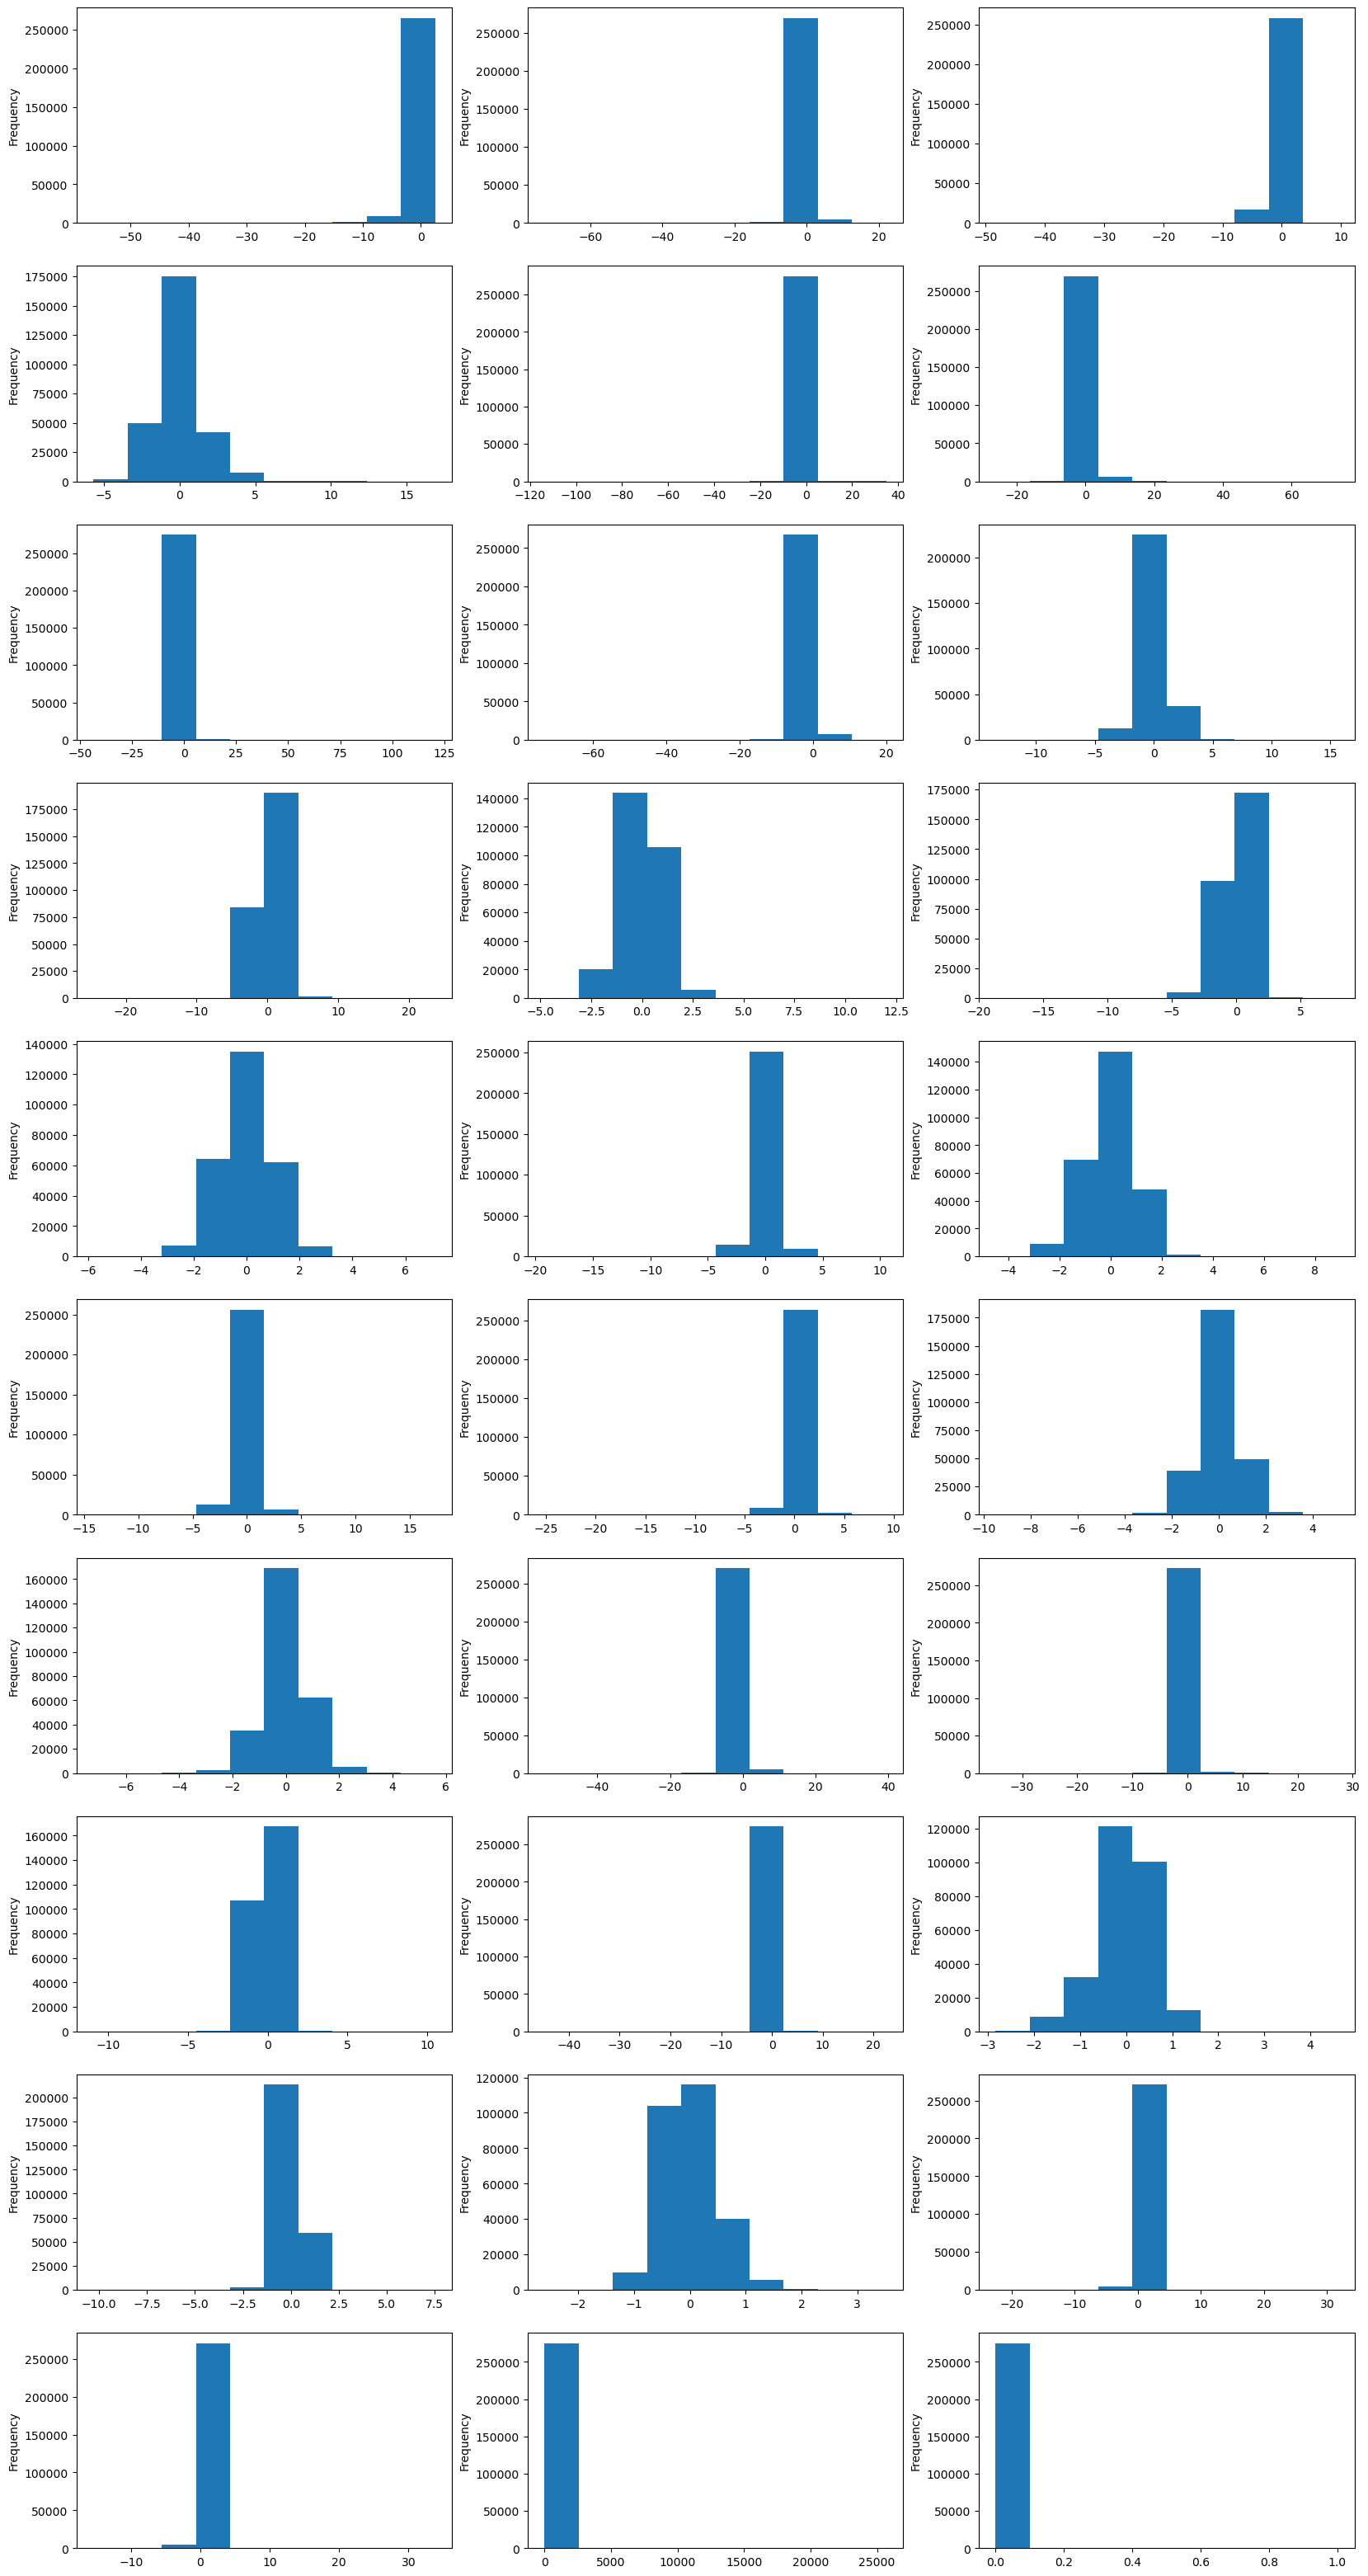

In [9]:
# histogram for outliers
fig = plt.figure(figsize=(20, 40))
i=0
for column in df:
    sub=fig.add_subplot(10,3,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

In [10]:
# dropping outliers and low variances
outVar = ['V1','V2','V5','V6','V7','V8','V20','V21','V23','V27','V28']
newdf = df.drop(columns=outVar,axis=1)
newdf.head(5)

,V3,V4,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V22,V24,V25,V26,Amount,Class
0,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.277838,0.066928,0.128539,-0.189115,149.62,0
1,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.638672,-0.339846,0.167170,0.125895,2.69,0
2,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.771679,-0.689281,-0.327642,-0.139097,378.66,0
3,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,0.005274,-1.175575,0.647376,-0.221929,123.50,0
4,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.798278,0.141267,-0.206010,0.502292,69.99,0


No outliers detected from looking at histogram results.

3. Feature Engineering

In [11]:
# ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
x = newdf.loc[:, ['V3','V4','V9','V10','V11','V12','V13','V14','V15',
                  'V16','V17','V18','V19','V22','V24','V25','V26','Amount']]
y = newdf.loc[:, 'Class']

fs = SelectKBest(score_func=f_classif, k='all')  # call the method
FeaturesS = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)
print(FeaturesS.scores_)    # print out the scores 
print(FeaturesS.pvalues_)

[ 9853.42862616  4762.01833092  2488.29530499 12478.56372266
  6454.73025584 18875.30575755     4.26682589 26776.57418454
     2.19835468 10124.62307929 30839.14848993  3159.2982887
   314.99003763     5.86454073    12.863902       3.55870639
     5.19542343     8.19146223]
[0.         0.         0.         0.         0.         0.
 0.03886439 0.         0.13815928 0.         0.         0.
 0.         0.01544953 0.00033504 0.05923493 0.0226472  0.00420912]


In [12]:
# dropping irrelevant variables. Any V variables below 100. 
lowF = ['V13','V22','V24','V26']
newdf = newdf.drop(columns=lowF,axis=1)
# dropping any values with a p value above 0.05
highP = ['V15','V25']
newdf = newdf.drop(columns=highP,axis=1)
newdf.head(5)

,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class
0,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,149.62,0
1,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,2.69,0
2,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,378.66,0
3,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,123.50,0
4,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,69.99,0


In [13]:
newdf.corr()

,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class
V3,1.000000,-0.000721,-0.002896,-0.011064,0.003763,-0.003365,-0.008208,0.000336,-0.002813,-0.003876,-0.000828,-0.220547,-0.185772
V4,-0.000721,1.000000,0.001395,0.003366,-0.004402,0.000561,0.005336,0.001783,0.001633,0.001569,0.005018,0.100626,0.130313
V9,-0.002896,0.001395,1.000000,-0.004957,-0.001583,0.000221,-0.005125,0.002680,-0.000488,-0.000957,-0.000936,-0.041446,-0.094583
V10,-0.011064,0.003366,-0.004957,1.000000,0.005211,-0.007395,-0.004616,-0.003637,-0.001841,0.000911,0.000379,-0.104586,-0.208104
V11,0.003763,-0.004402,-0.001583,0.005211,1.000000,0.003857,0.010052,0.001045,0.000127,-0.001735,0.002068,0.002091,0.151260
V12,-0.003365,0.000561,0.000221,-0.007395,0.003857,1.000000,-0.004061,-0.007692,-0.007395,-0.000761,-0.001743,-0.007607,-0.253150
V14,-0.008208,0.005336,-0.005125,-0.004616,0.010052,-0.004061,1.000000,-0.003320,0.000920,0.001413,-0.000751,0.033940,-0.297550
V16,0.000336,0.001783,0.002680,-0.003637,0.001045,-0.007692,-0.003320,1.000000,-0.010046,-0.009276,0.002407,-0.002611,-0.188222
V17,-0.002813,0.001633,-0.000488,-0.001841,0.000127,-0.007395,0.000920,-0.010046,1.000000,-0.007602,0.007940,0.007075,-0.317202
V18,-0.003876,0.001569,-0.000957,0.000911,-0.001735,-0.000761,0.001413,-0.009276,-0.007602,1.000000,0.000389,0.036231,-0.106447


In [14]:
# Normalize the data
x_final =  newdf.loc[:, ['V3','V4','V9','V10','V11','V12','V14',
                  'V16','V17','V18','V19','Amount']]
from sklearn.preprocessing import MinMaxScaler
nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final)    

In [15]:
print(x_scaled)

[[0.8813649  0.31302266 0.47531173 ... 0.65506586 0.59486323 0.00582379]
 [0.84029849 0.27179649 0.45398097 ... 0.64068109 0.55193042 0.00010471]
 [0.86814082 0.26876551 0.41060274 ... 0.64494538 0.38668313 0.01473892]
 ...
 [0.781102   0.22720215 0.47767719 ... 0.68050373 0.5182364  0.00264215]
 [0.84958713 0.28250841 0.47628661 ... 0.72990794 0.78961205 0.00038924]
 [0.84960146 0.22948762 0.47952794 ... 0.66480734 0.54331429 0.00844649]]


4. Prediction Modeling

The data will be balanced before being thrown into a train_test_split and then analyzed using KNN. I will build a prediction model using Logistical Regression. It will then be tested on its accuracy metric.

In [18]:
excludeCol = ['Class']

x = newdf.loc[:, ~newdf.columns.isin(excludeCol)]
y = newdf['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [20]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)  # call the method.
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)


(220530, 12)
(440304, 12)


In [21]:
# Build a KNN model
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_scaled, y) 

KNeighborsClassifier(n_neighbors=1)

In [22]:
LogRegression = LogisticRegression(penalty=None, max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

# By default, max_iter =100, and you do not have to set this parameter.However, if it reports an error 'ConvergenceWarning: lbfgs failed to converge (status = 1)', set up max_iter to a higher value. 


LogisticRegression(max_iter=2000, penalty=None)

Accuracy Score: 0.98


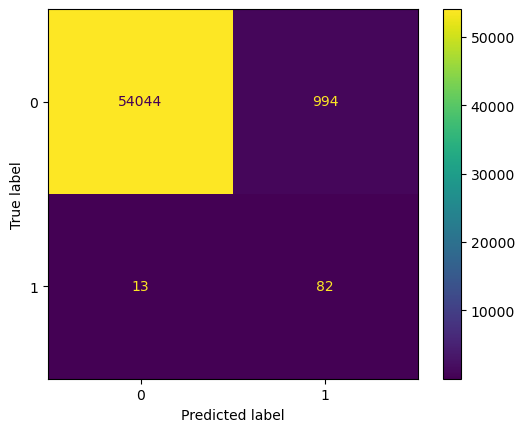

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

test_pred = LogRegression.predict(x_test)

accuracy = accuracy_score(y_test, test_pred)
print(f"Accuracy Score: {accuracy:.2f}")

